### Seaborn

Seaborn - популярная библиотека готовых шаблонов для статистической визуализации, написанная на бэкенде Matplotlib

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
df = pd.read_csv('heart.csv', sep = ',')
df['Cholesterol'] = np.where(df['Cholesterol']==0, np.nan, df['Cholesterol'])
df['RestingBP'] = np.where(df['RestingBP']==0, np.nan, df['RestingBP'])
df['FastingBS'] = np.where(df['FastingBS']==0, np.nan, df['FastingBS'])

Seaborn также реализован на matplotlib. Outofbox решение для построения визуализаций.

C:\Users\elavrukhina\AppData\Local\Temp\ipykernel_23568\911550241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =  df['ChestPainType'], palette='magma', hue=None)


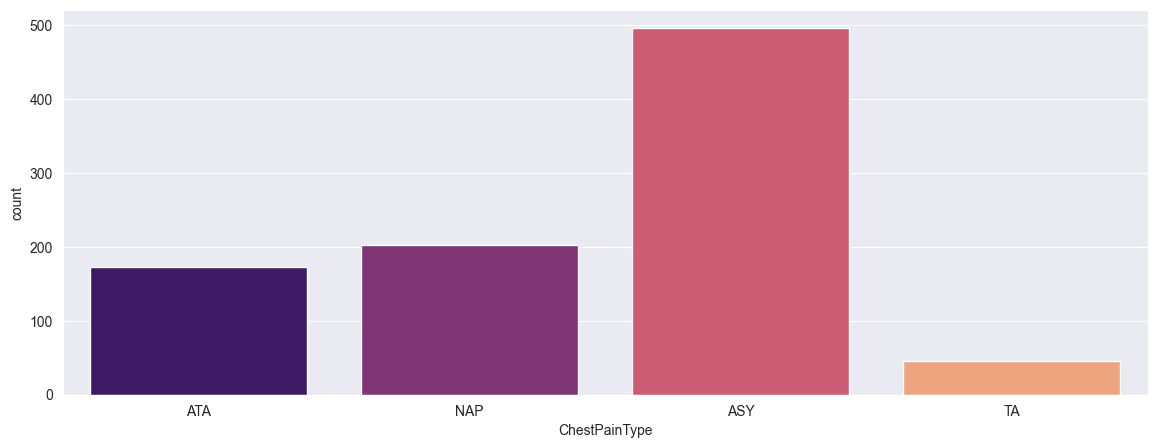

In [19]:
fig = plt.figure(figsize= (14,5))
sns.countplot(x =  df['ChestPainType'], palette='magma', hue=None)
#pandas bar = seaborn countplot
#Делается намного проще, нет нужды в агрегации с помощью value_counts
plt.show()

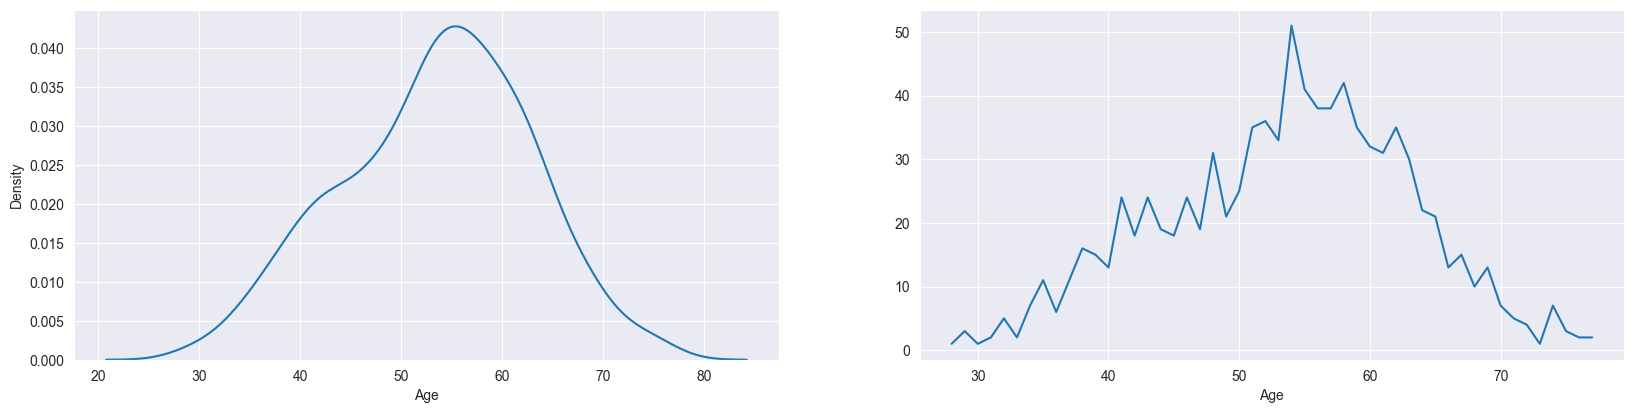

In [20]:
fig = plt.figure(figsize= (20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age.dropna())
#В статистике - оценка плотности ядра - один из вариантов сглаживания
ax2 = fig.add_subplot(222) 
df['Age'].value_counts().sort_index().plot.line()
plt.show()

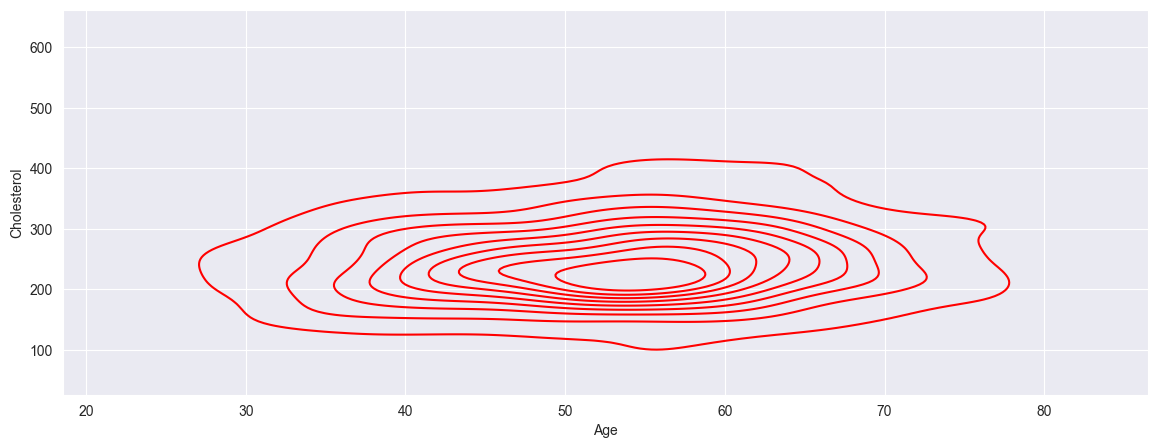

In [33]:
fig = plt.figure(figsize= (14,5))
sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, color='r',shade=False)
plt.show()

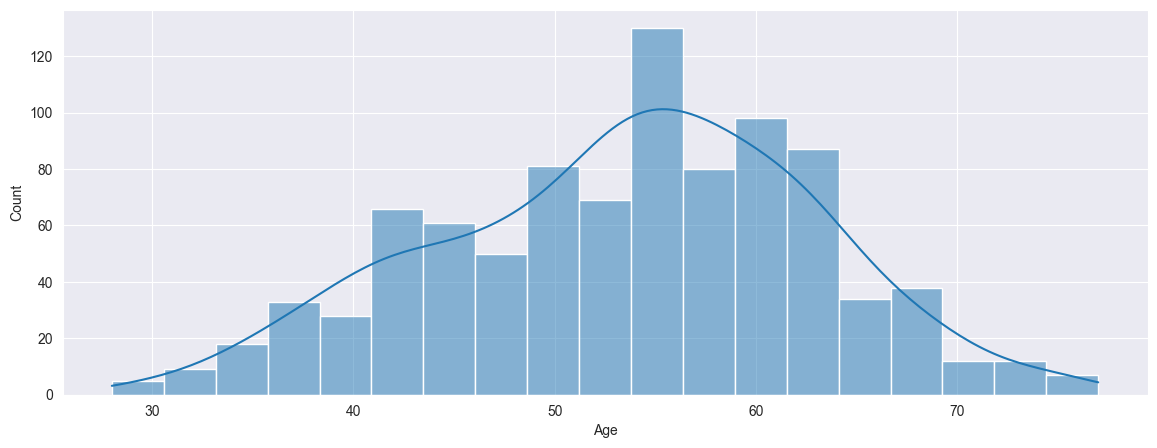

In [22]:
#Аналог гистограммы
fig = plt.figure(figsize= (14,5))
sns.histplot(df['Age'],kde = True)
plt.show()

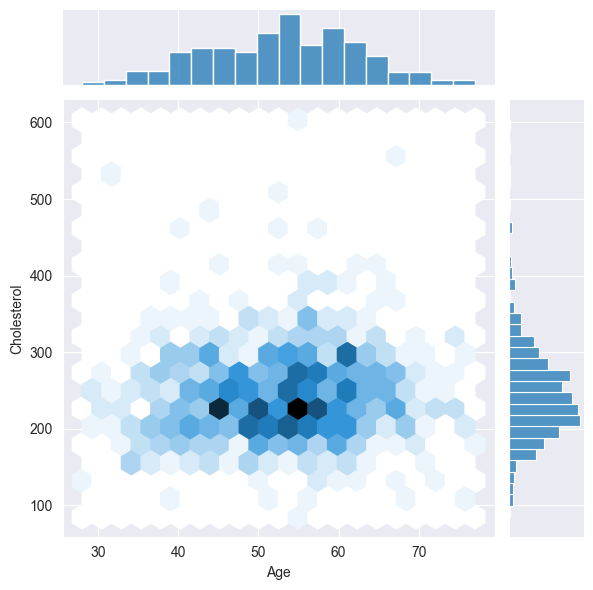

In [27]:
#Аналог scatterplot на одном графике- распределение данных, а также об их концентрации
sns.jointplot(x='Age', y='Cholesterol', data=df, kind = 'hex',gridsize=20)
plt.show()

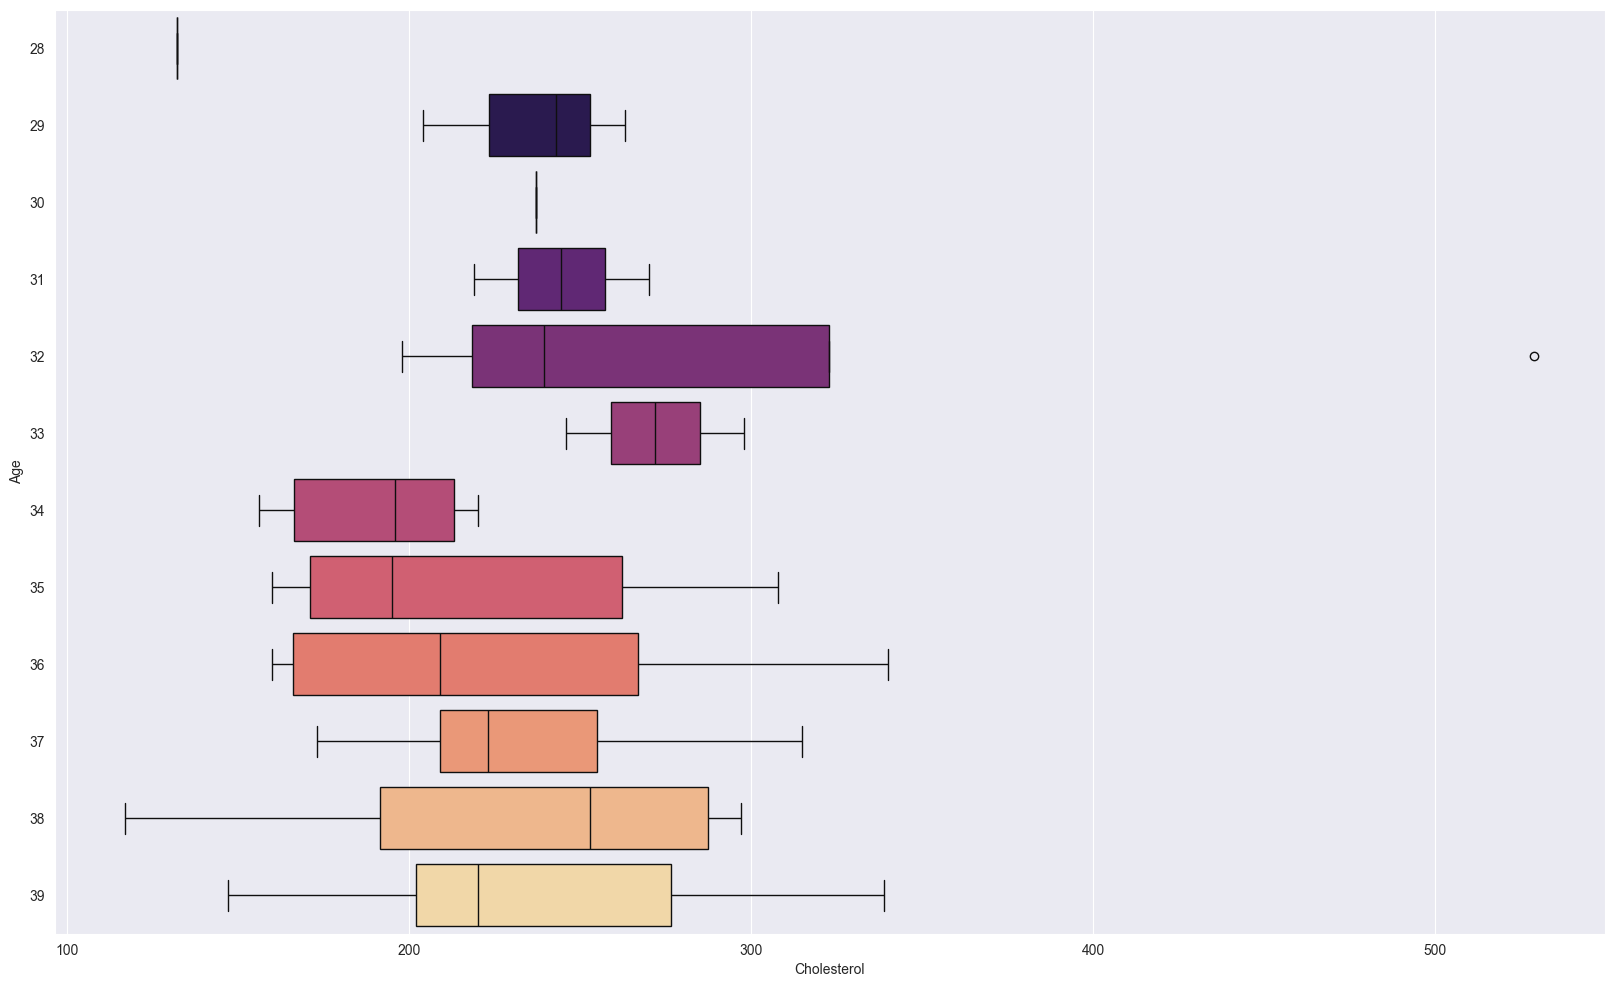

In [48]:
#границы -25 и 75 процентили, линия в середине - медиана, концы усов - края статистически значимой выборки без выбросов
# выбросы - точки за границами боксплотов
plt.figure(figsize=(20,12))
ax = sns.boxplot(y="Age", x="Cholesterol", data=df[df.Age.isin(np.arange(20,40,1))], orient="h", palette = 'magma')

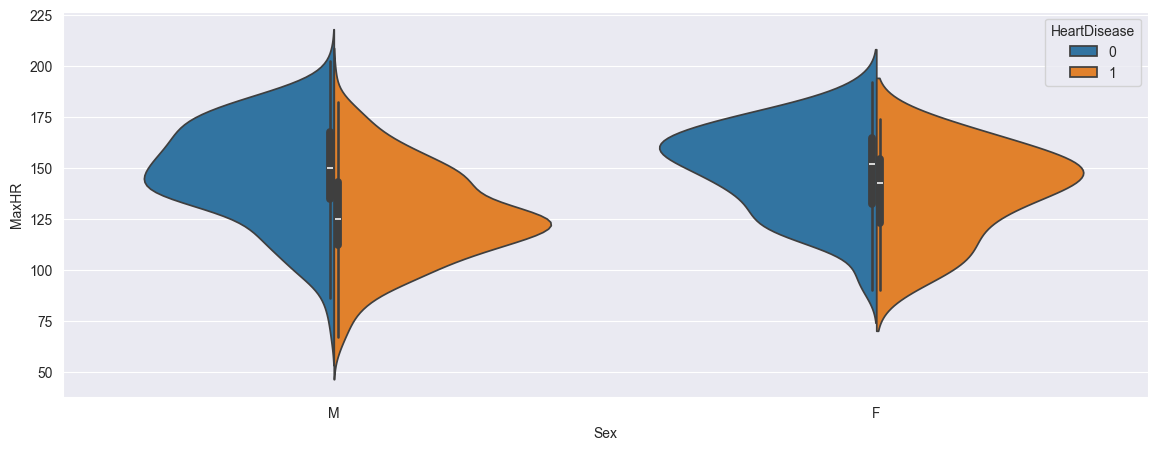

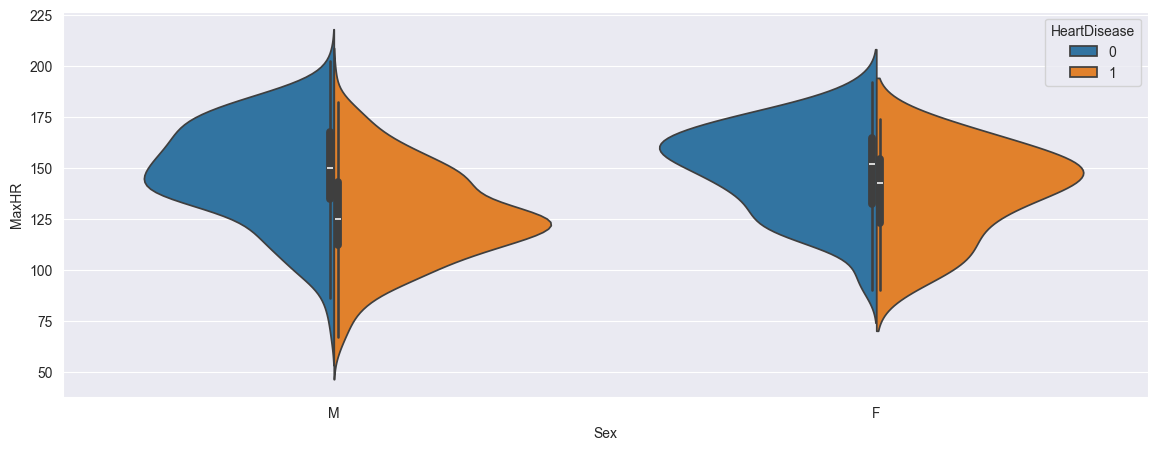

In [51]:
fig = plt.figure(figsize= (14,5))
sns.violinplot(y="MaxHR", x="Sex",hue = 'HeartDisease', split = True, data=df)
fig

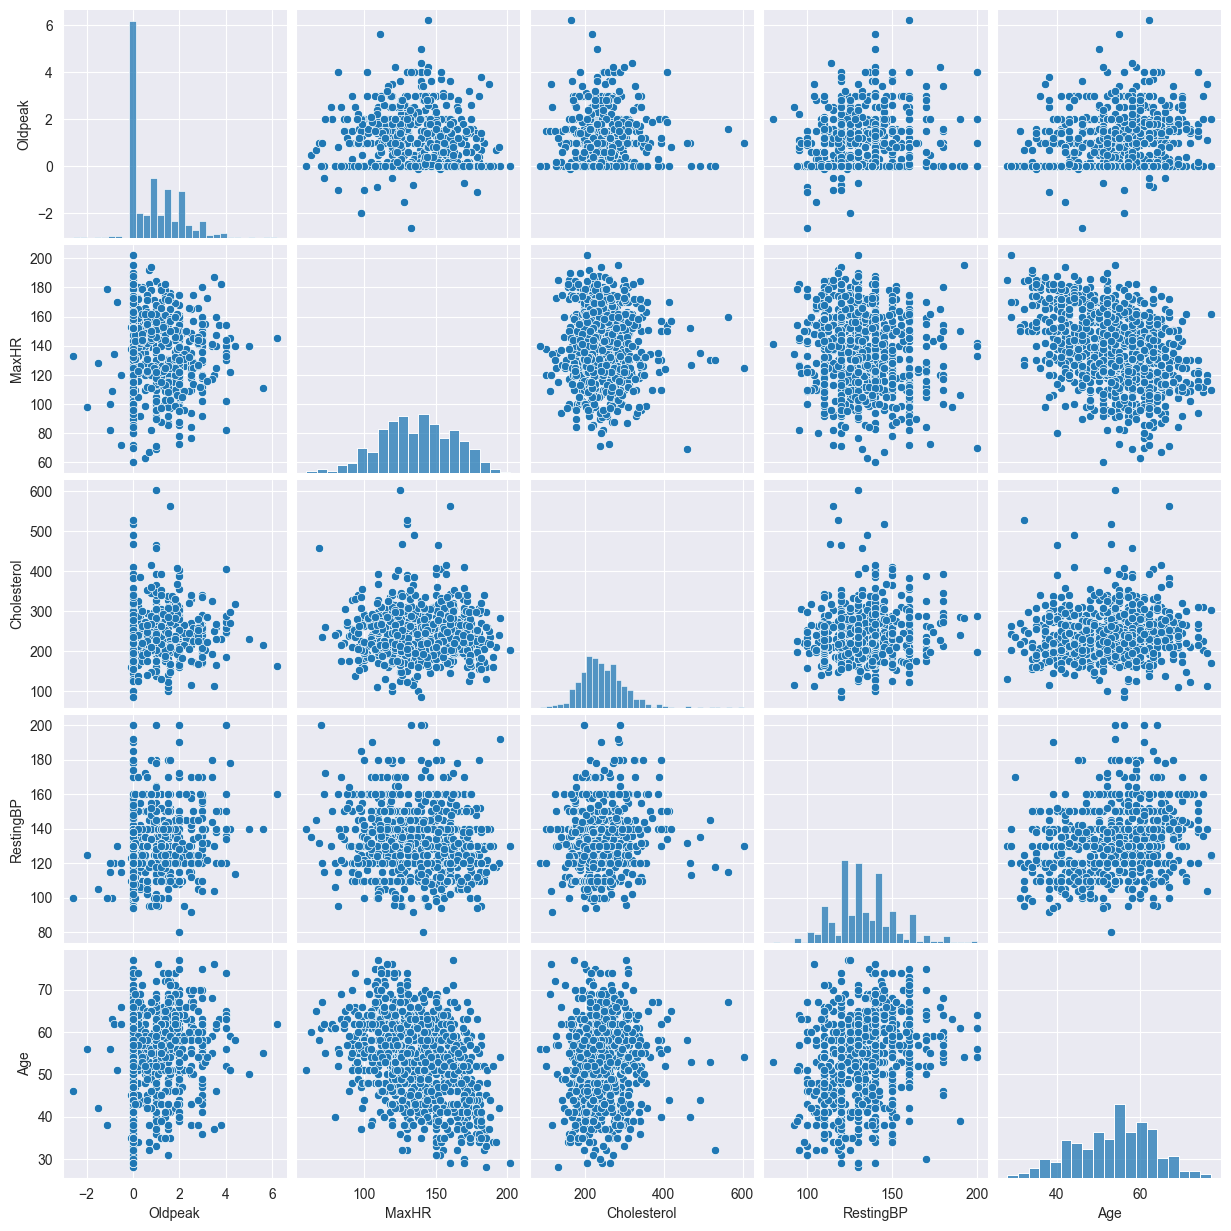

In [53]:
cols = ['Oldpeak', 'MaxHR',  'Cholesterol', 'RestingBP', 'Age']
sns_plot = sns.pairplot(df[cols]) #зависимость одной переменной от другой

In [54]:
#Корреляция признаков
df[cols].dropna().corr()

,Oldpeak,MaxHR,Cholesterol,RestingBP,Age
Oldpeak,1.000000,-0.259533,0.058488,0.198575,0.286006
MaxHR,-0.259533,1.000000,-0.019856,-0.125774,-0.382112
Cholesterol,0.058488,-0.019856,1.000000,0.095939,0.058758
RestingBP,0.198575,-0.125774,0.095939,1.000000,0.259865
Age,0.286006,-0.382112,0.058758,0.259865,1.000000


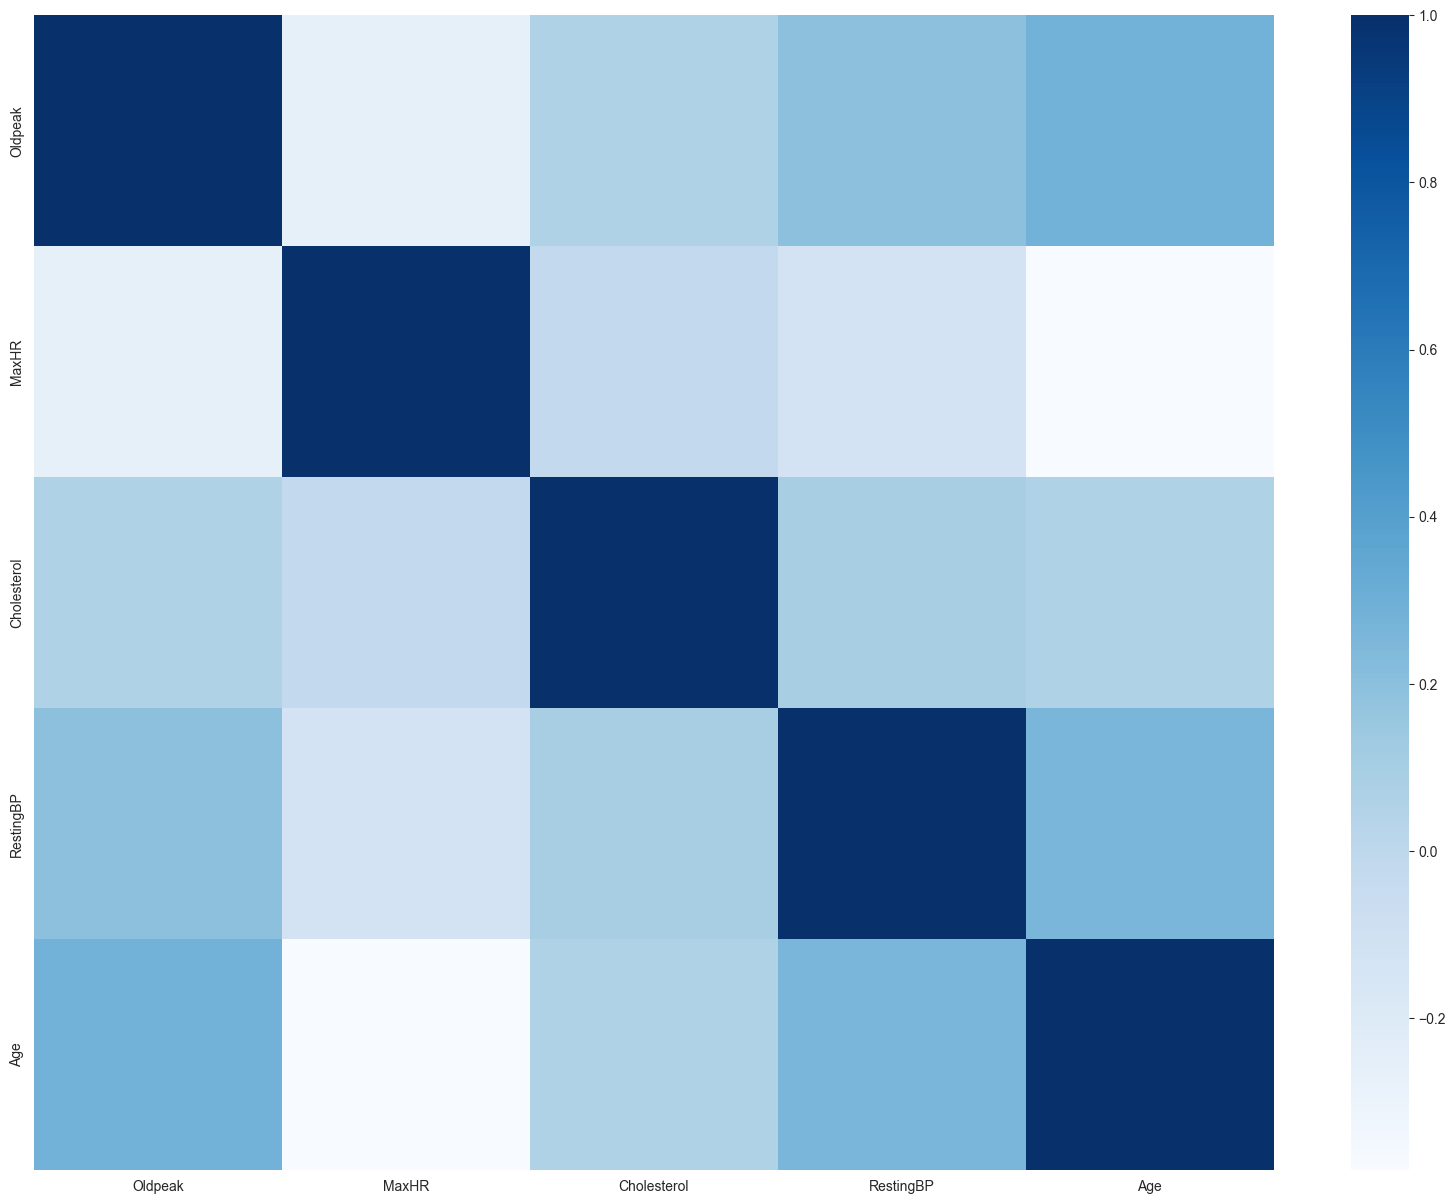

In [55]:
#Тепловая карта - e.g. как зависит холестерин от возраста
fig = plt.figure(figsize= (20,15))
sns.heatmap(df[cols].dropna().corr(), cmap = 'Blues')
plt.show()

### Folium
Folium - это библиотека визуализации данных в Python, чтобы помочь визуализировать геопространственные данные

In [ ]:
!pip install folium
import folium
from folium import plugins

In [58]:
partizan = pd.read_excel('partizan.xlsx')
partizan.tail()

,chain_name,lon,lat,orders
30,Zvjezda,37.718238,55.794452,4
31,Amazonija,37.748619,55.791744,5
32,Spasibo,37.728523,55.818736,0
33,Gurman_msk,37.734201,55.783089,0
34,Super_Papas,37.751179,55.780795,0


In [60]:
lats = list(partizan.lat)
longs = list(partizan.lon)
places=[[x[0],x[1]] for x in zip(lats,longs)]

m = folium.Map(places[0], tiles = 'OpenStreetMap', zoom_start=13)

plugins.MarkerCluster(places).add_to(m)
# plugins.BoatMarker(places[0]).add_to(m)
# plugins.FastMarkerCluster(places).add_to(m)

m

In [62]:
plugins.BoatMarker(places[0]).add_to(m)
m

In [63]:
plugins.FastMarkerCluster(places).add_to(m)
m

### Plotly
Plotly - бесплатная графическая библиотека с открытым исходным кодом, позволяющая осуществлять построения сложных интерактивных визуализаций

In [ ]:
!pip install plotly
import plotly.express as px
import plotly as py

In [ ]:
df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", color="size", facet_col="sex",
           color_continuous_scale=px.colors.sequential.Viridis, render_mode="webgl")
fig.show()

In [68]:
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp", size="pop", color="continent",
           hover_name="country", log_x=True, size_max=60)
fig.show()

In [69]:
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

In [70]:
py.offline.plot(fig, filename = 'magic.html', auto_open=False)

'magic.html'

In [49]:
#отключить варнинги, чтобы не засорять output
import warnings
warnings.filterwarnings("ignore")